## Defining Simple Graph using Langgraph
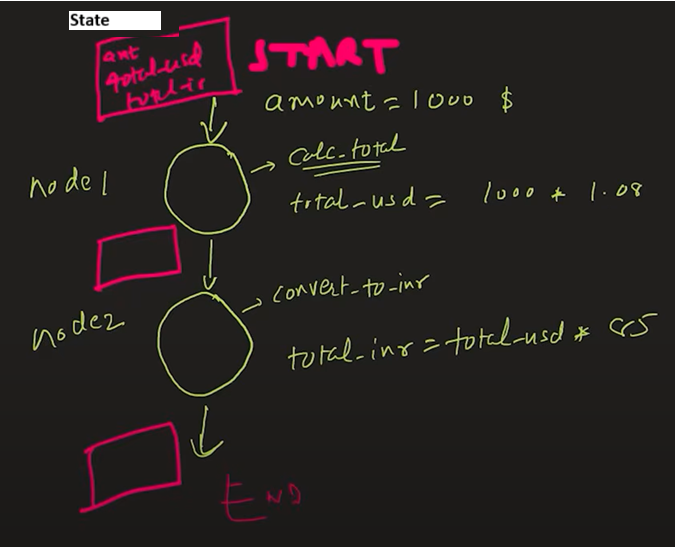

- **As defined in the above screenshot, let's define a State Object in Langgraph using a Python Class or a Python Dictionary**

- **Below PortfolioState class serves as the shared state that flows through different nodes in a graph-based workflow.**

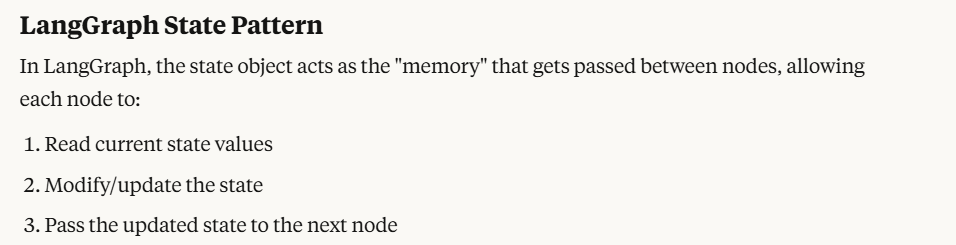

In [1]:
## As defined in the above screenshot, let's define a State Object in Langgraph using a Python Class or a Python Dictionary

## Below PortfolioState class serves as the shared state that flows through different nodes in a graph-based workflow.

## TypedDict from Python's typing module, allows you to create dictionary-like classes with defined structure and type hints.

from typing import TypedDict

class PortfolioState(TypedDict):
    """
    This creates a new class called `PortfolioState` that inherits from `TypedDict`. 
    Unlike regular classes, `TypedDict` creates a dictionary structure with predefined 
    keys and their expected data types.
    
    Attributes/Fields:
    The class defines three fields, all with `float` data type:
    * `amount_usd: float` - Likely represents a specific amount in US dollars 
      (could be an investment amount, transaction value, etc.)
    * `total_usd: float` - Represents the total portfolio value in US dollars
    * `total_inr: float` - Represents the total portfolio value in Indian Rupees
    """
    amount_usd: float
    total_usd: float
    total_inr: float

In [ ]:
## Instantiate the PortfolioState Type Hint with example values

# portfolio_state: PortfolioState = {
#     "amount_usd": 1000.0,
#     "total_usd": 5000.0,
#     "total_inr": 400000.0
# }

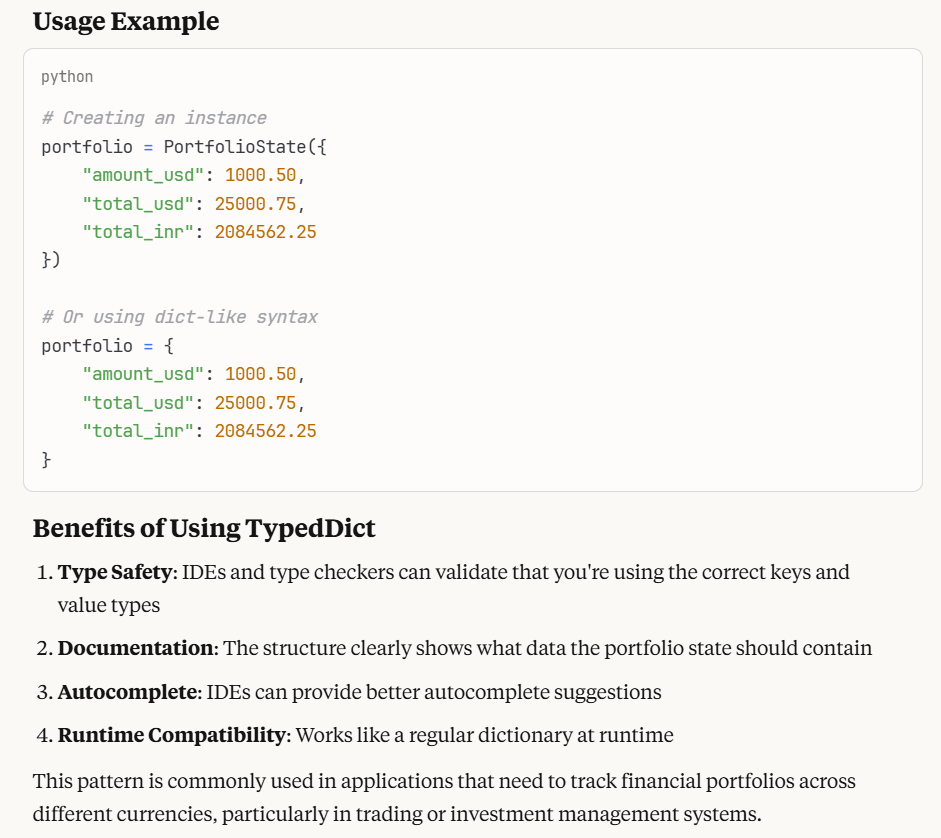

- **Lets define the Nodes now in Langgraph which is nothing but a simple Python Function which takes State as an input/parameter**

In [2]:
## Lets define the Nodes now in Langgraph which is nothing but a simple Python Function which takes State as an input/parameter

def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 85
    return state

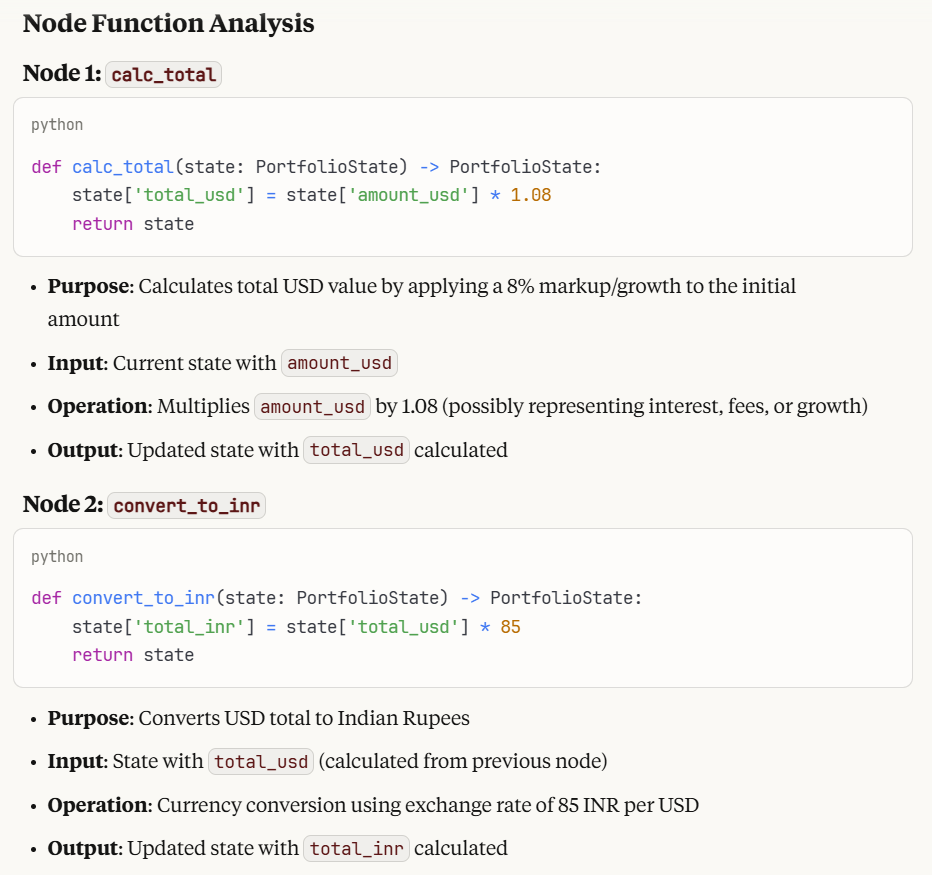

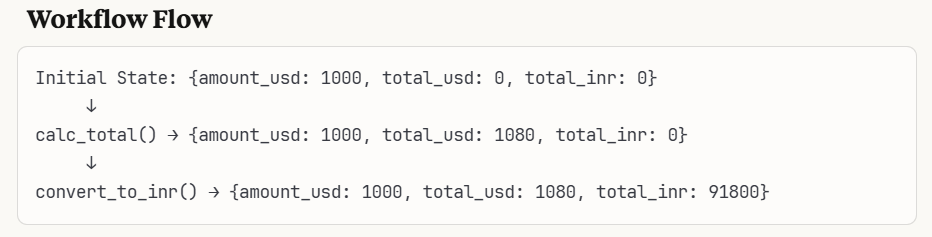

In [4]:
## A StateGraph object defines the structure of our chatbot as a "state machine". 
## We'll add nodes to represent the llm and functions our chatbot can call and edges to specify how the bot should transition between these functions.

from langgraph.graph import StateGraph, START, END
builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_inr_node", convert_to_inr)

builder.add_edge(START, "calc_total_node")
builder.add_edge("calc_total_node", "convert_to_inr_node")
builder.add_edge("convert_to_inr_node", END)

graph = builder.compile()

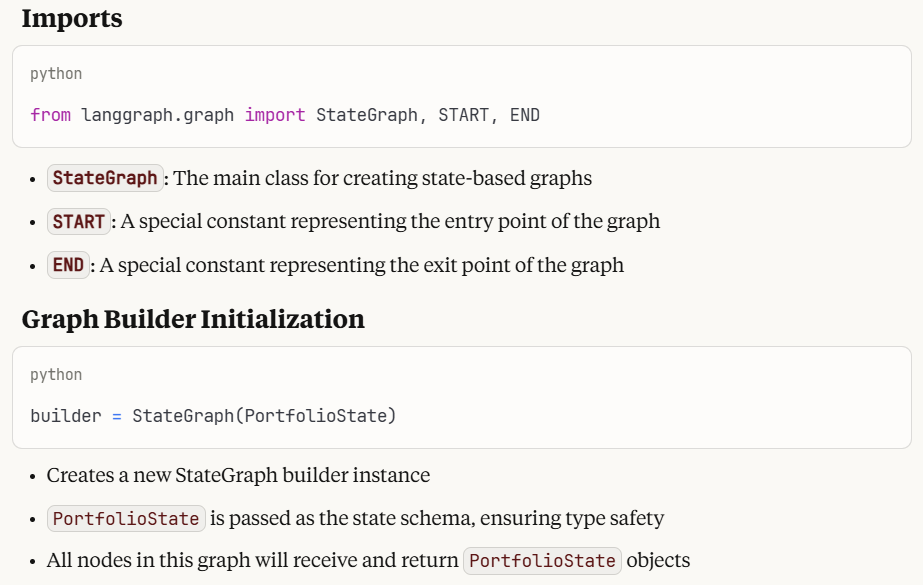
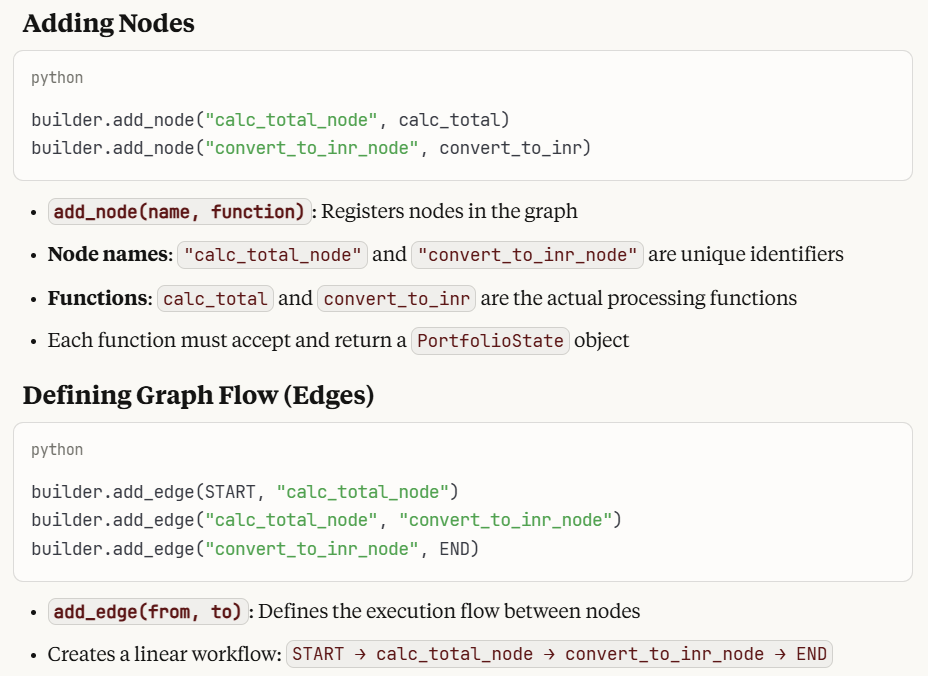
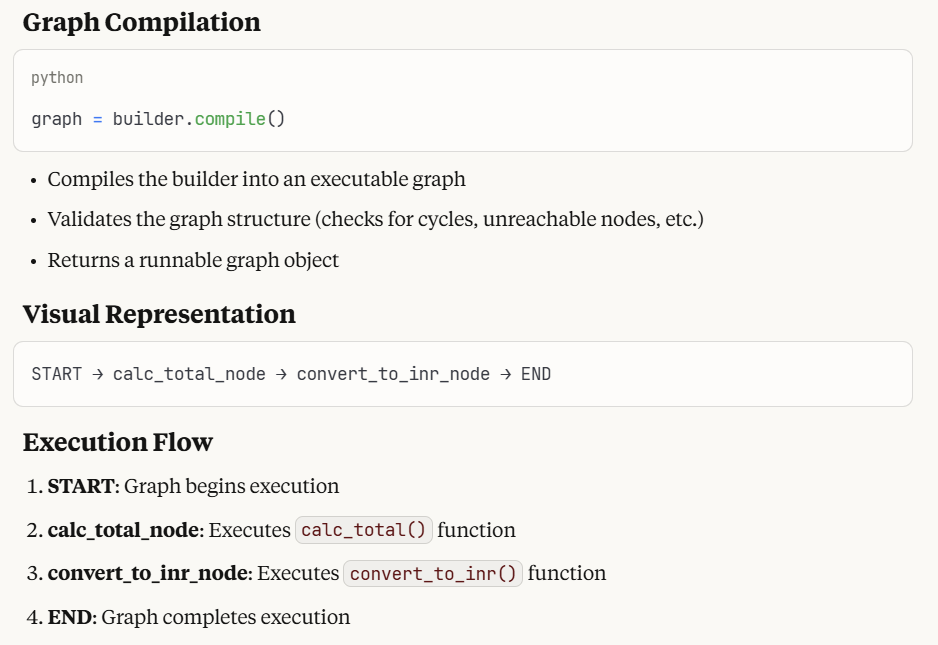

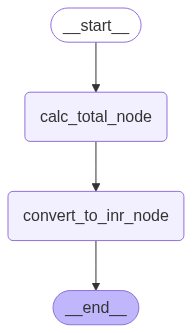

In [5]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [7]:
graph.invoke({"amount_usd": 1000})

{'amount_usd': 1000, 'total_usd': 1080.0, 'total_inr': 91800.0}

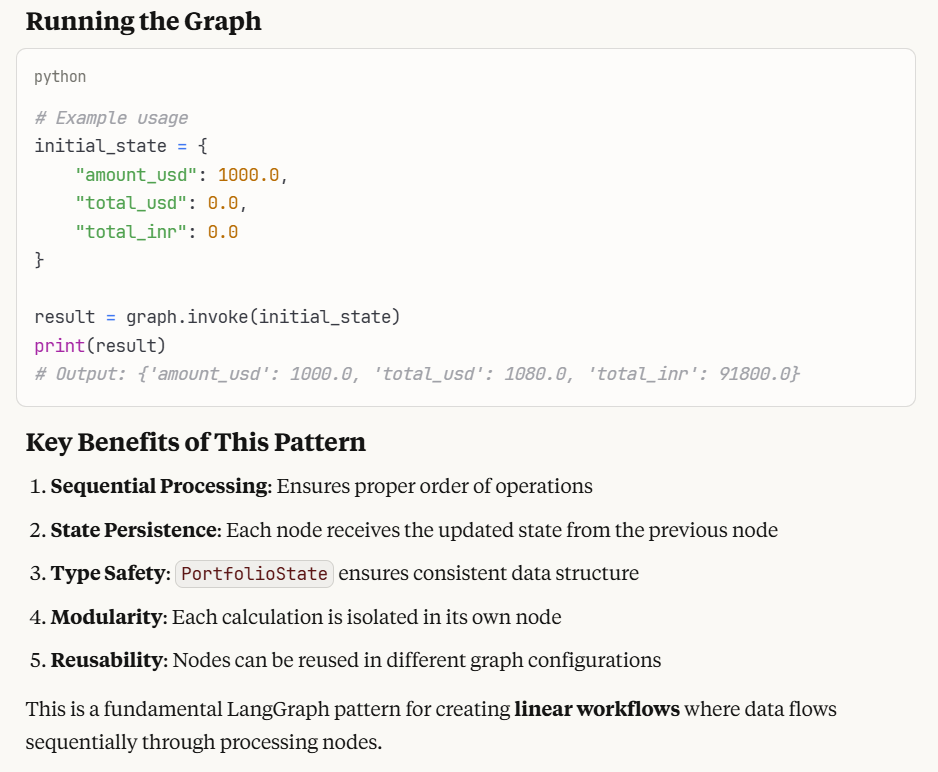